<a href="https://www.kaggle.com/code/ashx010/digit-recognizer-cnn-computer-vision-0-986?scriptVersionId=136849920" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

### Data Handling

In [2]:
# Reading Data
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_set = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train_data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Label Counts
train_data['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [5]:
# Seperating Pixels and Labels
X = train_data.iloc[:, 1:]
y = train_data['label']

In [6]:
# Reshape data in 28x28 Black & White image format
Xr = X.values.reshape(-1, 28, 28, 1)
test_setr = test_set.values.reshape(-1,28,28, 1)

In [7]:
# Converts a class vector (integers) to binary class matrix.
yr = tf.keras.utils.to_categorical(y, num_classes=10)

In [8]:
# Shape of Data
Xr.shape, yr.shape

((42000, 28, 28, 1), (42000, 10))

In [9]:
# Image Augmentation 

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.1,
                                   zoom_range = 0.1,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   rotation_range=10,)

Xr1 = train_datagen.flow(x=Xr, y=yr, batch_size=32)

In [10]:
# Image Augmentation : test data

test_datagen = ImageDataGenerator(rescale = 1./255)

test_setr1 = test_datagen.flow(x=test_setr, batch_size=32)

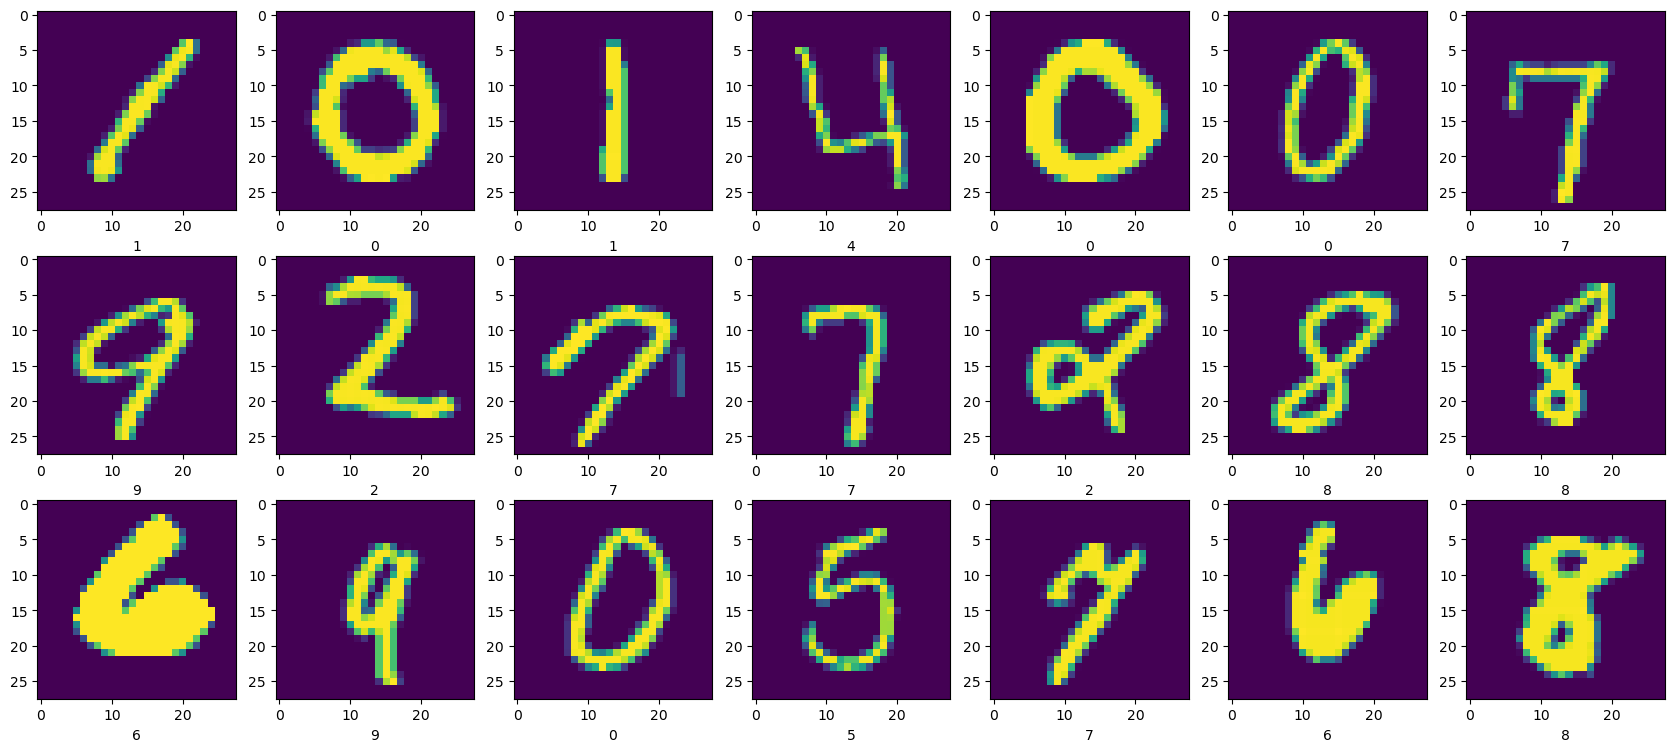

In [11]:
# Visualize some images
f,ax = plt.subplots(3, 7, figsize=(21,9))
for i in range(7):
    ax[0][i].imshow(Xr[i])
    ax[0][i].set_xlabel(y[i])
    ax[1][i].imshow(Xr[i+100])
    ax[1][i].set_xlabel(y[i+100])
    ax[2][i].imshow(Xr[i+500])
    ax[2][i].set_xlabel(y[i+500])
    
plt.show()

### CNN Model Training

In [12]:
# model 
cnn = tf.keras.models.Sequential()

In [13]:
# Adding Convolutional and Pooling Layers

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28,28,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding more layers

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))

In [14]:
# Flattening layer
cnn.add(tf.keras.layers.Flatten())

In [15]:
# Hidden Layer to train neural network
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [16]:
# Output Layer
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [17]:
# Compiling using Stochastic Gradient Descent and Loss function
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
# Train Neural Network
cnn.fit(x=Xr1, epochs = 10)

Epoch 1/10
1313/1313 [==============================] - 45s 33ms/step - loss: 0.2293 - accuracy: 0.9272
Epoch 2/10
1313/1313 [==============================] - 44s 33ms/step - loss: 0.0765 - accuracy: 0.9766
Epoch 3/10
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0550 - accuracy: 0.9822
Epoch 4/10
1313/1313 [==============================] - 44s 34ms/step - loss: 0.0479 - accuracy: 0.9855
Epoch 5/10
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0407 - accuracy: 0.9876
Epoch 6/10
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0386 - accuracy: 0.9876
Epoch 7/10
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0356 - accuracy: 0.9895
Epoch 8/10
1313/1313 [==============================] - 43s 32ms/step - loss: 0.0323 - accuracy: 0.9901
Epoch 9/10
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0305 - accuracy: 0.9904
Epoch 10/10
1313/1313 [==============================] - 43s 33m

In [19]:
# Predict the Test data on neuron
ypred = cnn.predict(test_setr)

875/875 [==============================] - 8s 9ms/step


In [20]:
# Using argmax() to return maximum values along an axis.
test_preds = []
for i in range(len(ypred)):
    test_preds.append(np.argmax(ypred[i]))

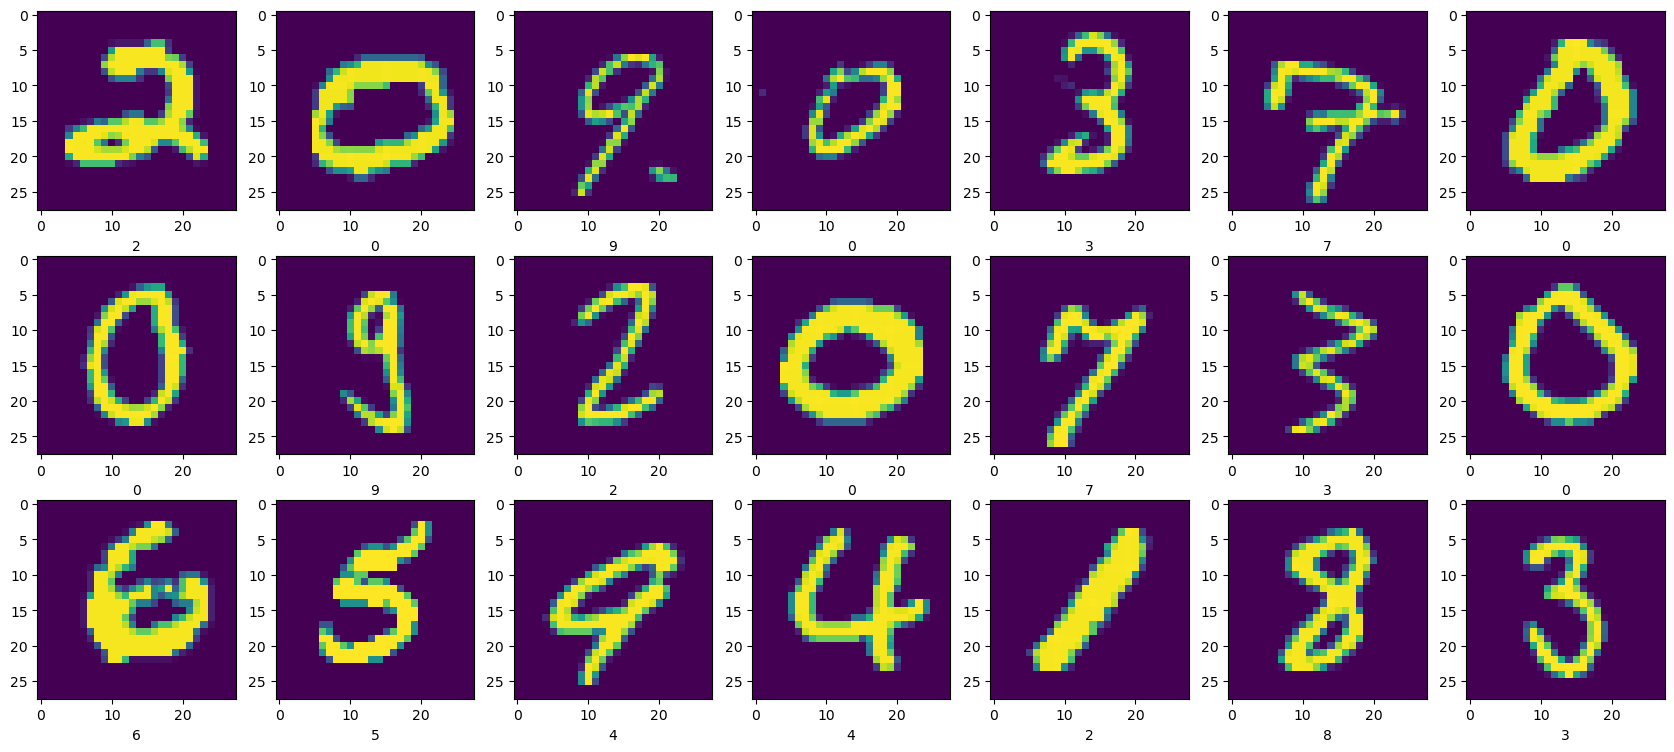

In [21]:
# Visualize some predicted images
f,ax = plt.subplots(3, 7, figsize=(21,9))
for i in range(7):
    ax[0][i].imshow(test_setr[i])
    ax[0][i].set_xlabel(test_preds[i])
    ax[1][i].imshow(test_setr[i+100])
    ax[1][i].set_xlabel(test_preds[i+100])
    ax[2][i].imshow(test_setr[i+500])
    ax[2][i].set_xlabel(test_preds[i+500])
    
plt.show()

### Submission

In [22]:
sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [23]:
sub.Label = test_preds

In [24]:
sub.to_csv('submission.csv', index=False)